# In this project we will build a Machine Learning model to predict whether an indiviudal will have a stroke.  The data used in this project can be found on kaggle at the following link: https://www.kaggle.com/asaumya/healthcare-data#train_2v.csv

# In this notebook, we build and implement our Machine Learning model.  To view our initial data analysis, please see the notebook titled "Data_Analysis."

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import os

# Define file path to our data
stoke_data_relevant_features_and_label_file_path = os.path.join("..", "Data", "stroke_data_relevant_features_and_label.csv")

# Create dataframe from local csv file 
stroke_data_relevant_features_and_label = pd.read_csv(stoke_data_relevant_features_and_label_file_path)

# Previe dataframe
stroke_data_relevant_features_and_label.head()

,hypertension,heart_disease,ever_married,work_type,smoking_status,age,average_glucose_level,bmi,stroke
0,0,0,No,children,smokes,3.0,95.12,18.0,0
1,1,0,Yes,other,never smoked,58.0,87.96,39.2,0
2,0,0,No,other,smokes,8.0,110.89,17.6,0
3,0,0,Yes,other,formerly smoked,70.0,69.04,35.9,0
4,0,0,No,other,smokes,14.0,161.28,19.1,0


#### We want to one hot encode our categorical columns, so we will convert each 0 to "No," and each 1 to "Yes."

In [48]:
# Before we replace 0 and 1 with "no" and "yes",
# we should check to see if either of these numbers are present in the age column
number_of_people_age_0 = len(stroke_data_relevant_features_and_label[stroke_data_relevant_features_and_label["age"] == 0])
number_of_people_age_1 = len(stroke_data_relevant_features_and_label[stroke_data_relevant_features_and_label["age"] == 1])

print(f"Number of people of age 0: {number_of_people_age_0}")
print(f"Number of people of age 1: {number_of_people_age_1}")

Number of people of age 0: 0
Number of people of age 1: 34


In [49]:
# When we replace all values of 0 and 1 with "No" and "Yes,"
# we are going to replace ages of 1 with a value of "Yes"
# We will also replace the binary data in the stroke column with strings.
# We will therefore make copies of these rows to put back in the dataframe after our initial replacement

copy_of_data = pd.DataFrame()

# copy_of_data["age"] = stroke_data_relevant_features_and_label["age"]
# copy_of_data["stroke"] = stroke_data_relevant_features_and_label["stroke"]

copy_of_data_age = [stroke_data_relevant_features_and_label["age"]]
copy_of_data_stroke = [stroke_data_relevant_features_and_label["stroke"]]

In [50]:
# Replace each 0 with "No," and each 1 with "Yes."
stroke_data_relevant_features_and_label[["hypertension", "heart_disease"]].replace(0, "No", inplace=True)
stroke_data_relevant_features_and_label[["hypertension", "heart_disease"]].replace(1, "Yes", inplace=True)

# Preview dataframe after converting binary data to strings
stroke_data_relevant_features_and_label.head()

C:\Users\tyler\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\tyler\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,hypertension,heart_disease,ever_married,work_type,smoking_status,age,average_glucose_level,bmi,stroke
0,0,0,No,children,smokes,3.0,95.12,18.0,0
1,1,0,Yes,other,never smoked,58.0,87.96,39.2,0
2,0,0,No,other,smokes,8.0,110.89,17.6,0
3,0,0,Yes,other,formerly smoked,70.0,69.04,35.9,0
4,0,0,No,other,smokes,14.0,161.28,19.1,0


In [51]:
# Check to see if either if the values of 1 in the age column were changed
number_of_people_age_1 = len(stroke_data_relevant_features_and_label[stroke_data_relevant_features_and_label["age"] == 1])

print(f"Number of people of age 1: {number_of_people_age_1}")

Number of people of age 1: 34


In [52]:
# # Replace the values in the post-replacement age and stroke columns with the original values
# stroke_data_relevant_features_and_label["age"] = copy_of_data_age
# stroke_data_relevant_features_and_label["stroke"] = copy_of_data_stroke

# # Preview dataframe to confirm values in stroke column were fixed
# stroke_data_relevant_features_and_label.head()

In [53]:
# Confirm binary data proplerly converted
print(stroke_data_relevant_features_and_label["hypertension"].value_counts())
print(100*"-")
print(stroke_data_relevant_features_and_label["heart_disease"].value_counts())

0    39339
1     4061
Name: hypertension, dtype: int64
----------------------------------------------------------------------------------------------------
0    41338
1     2062
Name: heart_disease, dtype: int64


In [54]:
# Transform data to one hot encoded data
machine_ready_stroke_data = pd.get_dummies(stroke_data_relevant_features_and_label, columns=["hypertension", "heart_disease", "ever_married", "work_type", "smoking_status"])
machine_ready_stroke_data.head()

,age,average_glucose_level,bmi,stroke,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Self-employed,work_type_children,work_type_other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,95.12,18.0,0,1,0,1,0,1,0,0,1,0,0,0,1
1,58.0,87.96,39.2,0,0,1,1,0,0,1,0,0,1,0,1,0
2,8.0,110.89,17.6,0,1,0,1,0,1,0,0,0,1,0,0,1
3,70.0,69.04,35.9,0,1,0,1,0,0,1,0,0,1,1,0,0
4,14.0,161.28,19.1,0,1,0,1,0,1,0,0,0,1,0,0,1


In [55]:
# Import Maching Learning algorithms will we try out
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [56]:
# Create our features and label
X = np.array(machine_ready_stroke_data.drop(["stroke"], axis=1))
y = np.array(machine_ready_stroke_data["stroke"].values.reshape(-1,1))

We now have our features and labels, but the data is still imbalanced.  We will try employing SMOTE to handle this issue.

### In the following section, we will try running several loops to see what the effect of changing several parameters is.

In [57]:
# Import SMOTE to handle the imbalanced data issue
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

# Import tree to use the DecisionTreeClassifier() algorithm
from sklearn import tree

#### SMOTE parameters

##### In the cell below we examine how accuracy changes when adjusting the SMOTE parameter sampling_strategy

In [131]:
# Create an array of arguments to iteratively try out
sampling_strategy_arguments = np.arange(0.6, 1, 0.05)

for sampling_strategy_argument in sampling_strategy_arguments:
    smote = SMOTE(sampling_strategy=sampling_strategy_argument, k_neighbors=4)
    X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
    # Split the data into training and testing sets
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=3)
    
    # Create, fit, and score the decision tree classifier
    classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
    classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
    score = classifier.score(X_smote_test, y_smote_test)
    
    # Print a list of accuracies based on the current argument
    print(f"Setting the sampling_strategy parameter to {sampling_strategy_argument} yields an accuracy of {score}")

classifier.feature_importances_

Setting the sampling_strategy parameter to 0.6 yields an accuracy of 0.837806129931075
Setting the sampling_strategy parameter to 0.65 yields an accuracy of 0.8323378839590444
Setting the sampling_strategy parameter to 0.7000000000000001 yields an accuracy of 0.8322981366459627
Setting the sampling_strategy parameter to 0.7500000000000001 yields an accuracy of 0.8145615446500403
Setting the sampling_strategy parameter to 0.8000000000000002 yields an accuracy of 0.8330074305827141
Setting the sampling_strategy parameter to 0.8500000000000002 yields an accuracy of 0.821738854714947
Setting the sampling_strategy parameter to 0.9000000000000002 yields an accuracy of 0.8250694658845322
Setting the sampling_strategy parameter to 0.9500000000000003 yields an accuracy of 0.8229950063173094


array([0.68239614, 0.        , 0.        , 0.        , 0.11540727,
       0.11563728, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08655931, 0.        ])

##### In the cell below we examine how accuracy changes when adjusting the SMOTE parameter k_neighbors

In [132]:
# Create an array of arguments to iteratively try out
k_neighbors_arguments = np.arange(1, 102, 10)

for k_neighbors_argument in k_neighbors_arguments:
    smote = SMOTE(sampling_strategy=0.85, k_neighbors=k_neighbors_argument)
    X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
    # Split the data into training and testing sets
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=3)
    
    # Create, fit, and score the decision tree classifier
    classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
    classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
    score = classifier.score(X_smote_test, y_smote_test)
    
    # Print a list of accuracies based on the current argument
    print(f"Setting the k_neighbor parameter to {k_neighbors_argument} yields an accuracy of {score}")
    
classifier.feature_importances_

Setting the k_neighbor parameter to 1 yields an accuracy of 0.8132411693829665
Setting the k_neighbor parameter to 11 yields an accuracy of 0.8384171475680132
Setting the k_neighbor parameter to 21 yields an accuracy of 0.8261145285052952
Setting the k_neighbor parameter to 31 yields an accuracy of 0.8455831060942355
Setting the k_neighbor parameter to 41 yields an accuracy of 0.8338512270911281
Setting the k_neighbor parameter to 51 yields an accuracy of 0.8513539222525208
Setting the k_neighbor parameter to 61 yields an accuracy of 0.8470416640243515
Setting the k_neighbor parameter to 71 yields an accuracy of 0.8482465597057518
Setting the k_neighbor parameter to 81 yields an accuracy of 0.8467245862134568
Setting the k_neighbor parameter to 91 yields an accuracy of 0.841841587925677
Setting the k_neighbor parameter to 101 yields an accuracy of 0.8567442450377323


array([0.60797247, 0.        , 0.        , 0.        , 0.        ,
       0.0422908 , 0.07844233, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17399425, 0.09730014])

#### train_test_split parameters

##### In the cell below we examine how accuracy changes when adjusting the train_test_split parameter test_size

In [133]:
# Create an array of arguments to iteratively try out
test_size_arguments = np.arange(0.05, 0.5, 0.05)

for test_size_argument in test_size_arguments:
    smote = SMOTE(sampling_strategy=0.85, k_neighbors=4)
    X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
    # Split the data into training and testing sets
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = test_size_argument, random_state=3)
    
    # Create, fit, and score the decision tree classifier
    classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
    classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
    score = classifier.score(X_smote_test, y_smote_test)
    
    # Print a list of accuracies based on the current argument
    print(f"Setting the train_test_split parameter to {test_size_argument} yields an accuracy of {score}")
    
classifier.feature_importances_

Setting the train_test_split parameter to 0.05 yields an accuracy of 0.823231042353538
Setting the train_test_split parameter to 0.1 yields an accuracy of 0.8243500317057705
Setting the train_test_split parameter to 0.15000000000000002 yields an accuracy of 0.8248076435275218
Setting the train_test_split parameter to 0.2 yields an accuracy of 0.8282706576193798
Setting the train_test_split parameter to 0.25 yields an accuracy of 0.8281670133428035
Setting the train_test_split parameter to 0.3 yields an accuracy of 0.8255612395890585
Setting the train_test_split parameter to 0.35000000000000003 yields an accuracy of 0.8257655372350063
Setting the train_test_split parameter to 0.4 yields an accuracy of 0.8240796524716999
Setting the train_test_split parameter to 0.45 yields an accuracy of 0.8300403055328505


array([0.68098354, 0.        , 0.        , 0.02695299, 0.03712895,
       0.04269668, 0.07557882, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13665901])

##### In the cell below we examine how accuracy changes when adjusting the train_test_split parameter random_state

In [134]:
# Create an array of arguments to iteratively try out
random_state_arguments = np.arange(1, 10, 1)

for random_state_argument in random_state_arguments:
    smote = SMOTE(sampling_strategy=0.85, k_neighbors=4)
    X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
    # Split the data into training and testing sets
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = test_size_argument, random_state=random_state_argument)
    
    # Create, fit, and score the decision tree classifier
    classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
    classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
    score = classifier.score(X_smote_test, y_smote_test)
    
    # Print a list of accuracies based on the current argument
    print(f"Setting the random_state parameter to {random_state_argument} yields an accuracy of {score}")
    
classifier.feature_importances_

Setting the random_state parameter to 1 yields an accuracy of 0.82347304039009
Setting the random_state parameter to 2 yields an accuracy of 0.8278981932974435
Setting the random_state parameter to 3 yields an accuracy of 0.8315623326474816
Setting the random_state parameter to 4 yields an accuracy of 0.8302094196566984
Setting the random_state parameter to 5 yields an accuracy of 0.8332534738859607
Setting the random_state parameter to 6 yields an accuracy of 0.8189915161081203
Setting the random_state parameter to 7 yields an accuracy of 0.8329716170128808
Setting the random_state parameter to 8 yields an accuracy of 0.8263197948081964
Setting the random_state parameter to 9 yields an accuracy of 0.8231348121423941


array([0.63495474, 0.        , 0.        , 0.04496052, 0.07508908,
       0.12537403, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11962162, 0.        ])

#### DecisionTreeClassifier() parameters

##### In the cell below we examine how accuracy changes when adjusting the DecisionTreeClassifier() parameter max_depth

In [135]:
# Create an array of arguments to iteratively try out
max_depth_arguments = np.arange(1, 102, 10)

for max_depth_argument in max_depth_arguments:
    smote = SMOTE(sampling_strategy=0.85, k_neighbors=4)
    X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
    # Split the data into training and testing sets
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=3)
    
    # Create, fit, and score the decision tree classifier
    classifier = tree.DecisionTreeClassifier(max_depth=max_depth_argument, max_leaf_nodes=10)
    classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
    score = classifier.score(X_smote_test, y_smote_test)
    
    # Print a list of accuracies based on the current argument
    print(f"Setting the max_depth parameter to {max_depth_argument} yields an accuracy of {score}")
    
classifier.feature_importances_

Setting the max_depth parameter to 1 yields an accuracy of 0.7664404844948951
Setting the max_depth parameter to 11 yields an accuracy of 0.8151436362483353
Setting the max_depth parameter to 21 yields an accuracy of 0.8235144904559579
Setting the max_depth parameter to 31 yields an accuracy of 0.8157777918701249
Setting the max_depth parameter to 41 yields an accuracy of 0.8245291394508212
Setting the max_depth parameter to 51 yields an accuracy of 0.823324243769421
Setting the max_depth parameter to 61 yields an accuracy of 0.8259876973809372
Setting the max_depth parameter to 71 yields an accuracy of 0.8262413596296532
Setting the max_depth parameter to 81 yields an accuracy of 0.8234510748937789
Setting the max_depth parameter to 91 yields an accuracy of 0.8245291394508212
Setting the max_depth parameter to 101 yields an accuracy of 0.8224364258989156


array([0.66362891, 0.        , 0.        , 0.        , 0.12472703,
       0.07915995, 0.04360454, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08887956, 0.        ])

##### In the cell below we examine how accuracy changes when adjusting the DecisionTreeClassifier() parameter max_depth

In [136]:
# Create an array of arguments to iteratively try out
max_nodes_arguments = np.arange(2, 153, 10)

for max_nodes_argument in max_nodes_arguments:
    smote = SMOTE(sampling_strategy=0.85, k_neighbors=4)
    X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
    # Split the data into training and testing sets
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=3)
    
    # Create, fit, and score the decision tree classifier
    classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=max_nodes_argument)
    classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
    score = classifier.score(X_smote_test, y_smote_test)
    
    # Print a list of accuracies based on the current argument
    print(f"Setting the max_node parameter to {max_nodes_argument} yields an accuracy of {score}")

classifier.feature_importances_

Setting the max_node parameter to 2 yields an accuracy of 0.768025873549369
Setting the max_node parameter to 12 yields an accuracy of 0.8311877734796119
Setting the max_node parameter to 22 yields an accuracy of 0.8823641321580316
Setting the max_node parameter to 32 yields an accuracy of 0.9159109645507008
Setting the max_node parameter to 42 yields an accuracy of 0.914008497685332
Setting the max_node parameter to 52 yields an accuracy of 0.9228232608282072
Setting the max_node parameter to 62 yields an accuracy of 0.9297989726678927
Setting the max_node parameter to 72 yields an accuracy of 0.9291014014839242
Setting the max_node parameter to 82 yields an accuracy of 0.9372185934428309
Setting the max_node parameter to 92 yields an accuracy of 0.9300526349166085
Setting the max_node parameter to 102 yields an accuracy of 0.938613735810768
Setting the max_node parameter to 112 yields an accuracy of 0.940072293740884
Setting the max_node parameter to 122 yields an accuracy of 0.94134

array([0.44750791, 0.02971585, 0.01552606, 0.08562088, 0.02967842,
       0.02996018, 0.05195246, 0.00828343, 0.01970043, 0.03031044,
       0.        , 0.02766083, 0.04508525, 0.07805072, 0.10094716])

#### Now that we have a better idea of what impact each parameter does, we will try one final test below

In [142]:
smote = SMOTE(sampling_strategy=0.85, k_neighbors=4)
X_smote, y_smote = smote.fit_resample(X, y.ravel())
    
# Split the data into training and testing sets
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=3)

# Create, fit, and score the decision tree classifier
classifier = tree.DecisionTreeClassifier(max_depth=100, max_leaf_nodes=100)
classifier = classifier.fit(X=X_smote_train, y= y_smote_train)
score = classifier.score(X_smote_test, y_smote_test)

print(score, "\n")
print(classifier.feature_importances_)

0.946160187710064 

[0.43701992 0.0163728  0.00850112 0.10423464 0.01187932 0.00124176
 0.08944597 0.0111228  0.01075459 0.04141842 0.         0.03366549
 0.06072232 0.11173637 0.06188448]


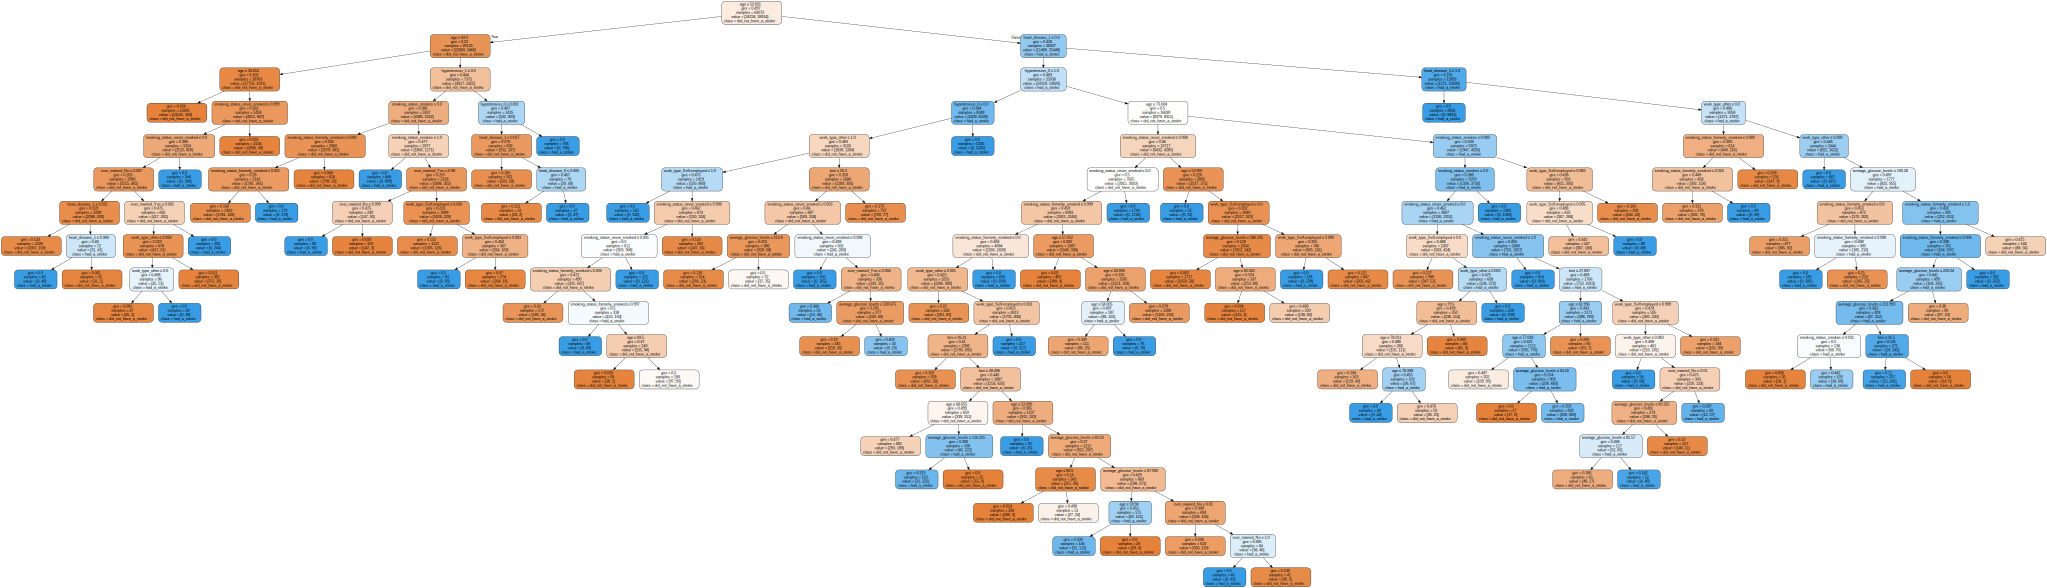

In [144]:
import graphviz

feature_names = ["age",
                 "average_glucose_levels",
                 "bmi",
                 "hypertension_0",
                 "hypertension_1",
                 "heart_disease_0",
                 "heart_disease_1",
                 "ever_married_No",
                 "ever_married_Yes",
                 "work_type_Self-employed",
                 "work_type_children",
                 "work_type_other",
                 "smoking_status_formerly_smoked",
                 "smoking_status_never_smoked",
                 "smoking_status_smokes"
                ]
class_names=["did_not_have_a_stroke", "had_a_stroke"]

dot_data = tree.export_graphviz(classifier, out_file=None, 
                      feature_names=feature_names,
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data)  
graph 

In [67]:
from sklearn.preprocessing import StandardScaler

# Create scale for features and label
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale features and labels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
# models = []
# models.append(("LR", LogisticRegression()))
# models.append(("CART", DecisionTreeClassifier()))
# models.append(("CART", RandomForestClassifier()))
# models.append(("SVM", SVC()))
# models.append(("NB", GaussianNB()))

# from sklearn import model_selection

# # Evaluate each model in turn
# results = []
# names = []

# for name, model in models:
#     kfold = model_selection.KFold(n_splits=10, random_state=42)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
#     results.append(cv_results)
#     names.append(name)
#     print(f"{name}: {cv_results.mean()}, {cv_results.std()}")

In [69]:
# # look at this
# y_train.shape

(34720, 1)

In [73]:
classifier.feature_importances_

array([0.7990789 , 0.05888209, 0.07382833, 0.        , 0.        ,
       0.        , 0.06821068, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [75]:
# import graphviz

# decision_tree_data = tree.export_graphviz(
#   classifier,
#   out_file=None,
#   feature_names=["age",
#                  "average_glucose_levels",
#                  "bmi",
#                  "hypertension_0",
#                  "hypertension_1",
#                  "heart_disease_0",
#                  "heart_disease_1",
#                  "ever_married_No",
#                  "ever_married_Yes",
#                  "work_type_Self-employed",
#                  "work_type_children",
#                  "work_type_other",
#                  "smoking_status_formerly_smoked",
#                  "smoking_status_never_smoked",
#                  "smoking_status_smokes"
#                 ],
#     class_names=["did_not_have_a_stroke", "had_a_stroke"],
#     filled=True,
#     rounded=False
# )

# graph = graphviz.Source(decision_tree_data)
# #graph

# #graph[size="7.75,10.25"]

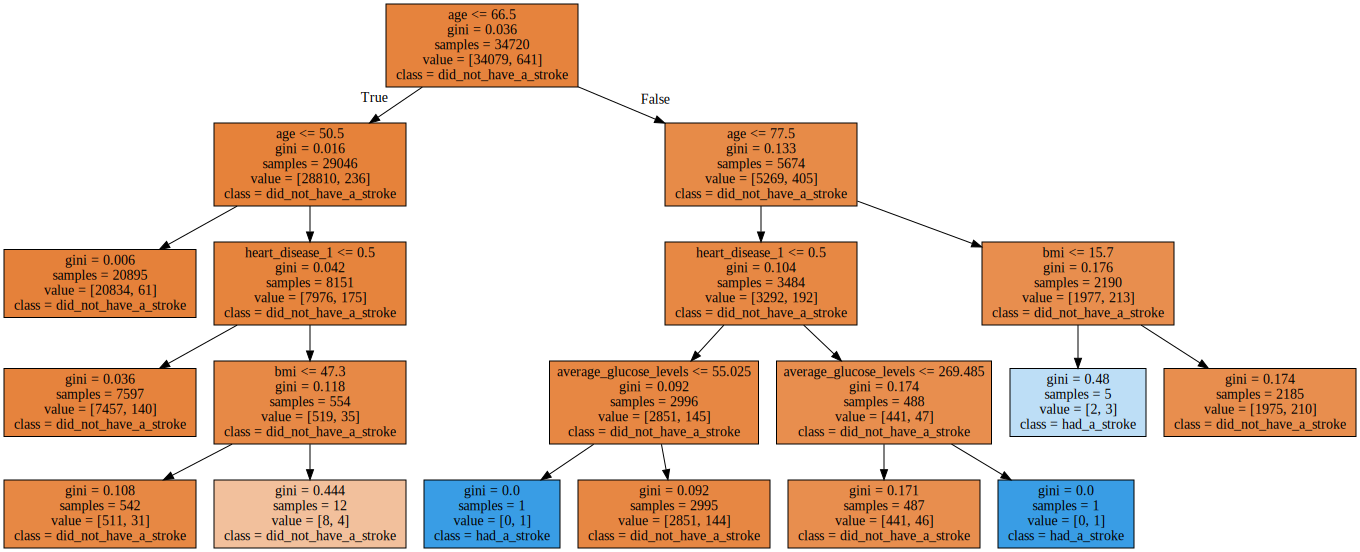

In [76]:
import graphviz

decision_tree_data = tree.export_graphviz(
  classifier,
  out_file=None,
  feature_names=["age",
                 "average_glucose_levels",
                 "bmi",
                 "hypertension_0",
                 "hypertension_1",
                 "heart_disease_0",
                 "heart_disease_1",
                 "ever_married_No",
                 "ever_married_Yes",
                 "work_type_Self-employed",
                 "work_type_children",
                 "work_type_other",
                 "smoking_status_formerly_smoked",
                 "smoking_status_never_smoked",
                 "smoking_status_smokes"
                ],
    class_names=["did_not_have_a_stroke", "had_a_stroke"],
    filled=True,
    rounded=False
)



graph = graphviz.Source(decision_tree_data)
graph

#graph[size="7.75,10.25"]

In [77]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_default_extension',
 '_encoding',
 '_engine',
 '_format',
 '_kwargs',
 '_repr_svg_',
 '_view',
 '_view_darwin',
 '_view_freebsd',
 '_view_linux',
 '_view_windows',
 'copy',
 'directory',
 'encoding',
 'engine',
 'filename',
 'filepath',
 'format',
 'from_file',
 'pipe',
 'render',
 'save',
 'source',
 'view']

In [78]:
dir(tree.export_graphviz)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [79]:
graph.render(format="png")

'Source.gv.png'

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

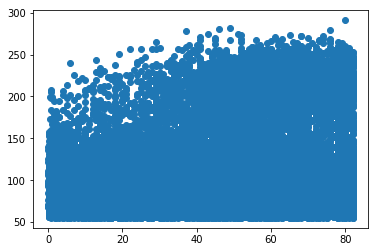

In [81]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1])

In [82]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=1)
rf = rf.fit(X_train, np.array(y_train))
rf.score(X_test, np.array(y_test))

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9675576036866359